In [1]:
from os.path import abspath

from pyspark.sql import SparkSession
from pyspark.sql import Row

import collections
import io
import re
import tarfile
import os.path
import nltk
import smart_open
import gensim.utils

import pandas as pd
import pyodbc
import string

import gensim
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import pyLDAvis
#import pyLDAvis.gensim_models #Version 3.3 ?
import pyLDAvis.gensim

import pkgutil

import pkg_resources
from symspellpy import SymSpell, Verbosity

import sparknlp

import time
import pandas as pd
import pyodbc
import logging
logging.basicConfig(format = '%(asctime)s : %(levelname)s : %(message)s', level=logging.WARNING)
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
from gensim import corpora
pd.set_option('float_format', '{:f}'.format)
import spacy

import os

In [ ]:
r"""
How to reproduce the doc2vec 'Paragraph Vector' paper
=====================================================

Shows how to reproduce results of the "Distributed Representation of Sentences and Documents" paper by Le and Mikolov using Gensim.

"""

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import collections

SentimentDocument = collections.namedtuple('SentimentDocument', 'words tags split sentiment')

###############################################################################
# We can now proceed with loading the corpus.
import io
import re
import tarfile
import os.path
import nltk
import smart_open
import gensim.utils

import pandas as pd
import pyodbc
import string

import gensim
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import pyLDAvis
import pyLDAvis.gensim_models

import pkg_resources
from symspellpy import SymSpell, Verbosity




import time
import pandas as pd
import pyodbc
import logging
logging.basicConfig(format = '%(asctime)s : %(levelname)s : %(message)s', level=logging.WARNING)
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
from gensim import corpora
pd.set_option('float_format', '{:f}'.format)
import spacy

#import en_core_web_sm
#nlp = en_core_web_sm.load()


conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=SQLIRS;'
                      'Trusted_Connection=yes;')

import urllib.request

import os

In [2]:
import matplotlib.pyplot as plt
from textblob import TextBlob
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

from sparknlp.pretrained import PretrainedPipeline

#pipeline = PretrainedPipeline('analyze_sentimentdl_glove_imdb', lang = 'en')

2021-12-23 16:47:44,345 loading file /home/cdsw/.flair/models/sentiment-en-mix-distillbert_4.pt


In [3]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [5]:
pkgutil.iter_modules(['pyLDAvis'])

pkgpath = os.path.dirname(pyLDAvis.__file__)
print([name for _, name, _ in pkgutil.iter_modules([pkgpath])])

['_display', '_prepare', '_server', 'gensim', 'graphlab', 'sklearn', 'urls', 'utils']


In [6]:
# Data_frame with irspublish..TV_AVMerr_RentSale with

#stmt2 = """select * from irspublish..TV_AVMerr_RentSale with (Nolock) where rentsale='S'
#and cbsa in ('12060','19100','32820','16740','28140','45300','34980','26900',
#'36740','13820','38060','27260','36420','26420','31140','41180','41700','39580',
#'49180','35840','29460','33100','15980','37340','18140','24660','46060','19660',
#'29820','19740','20500','38940','33460','42660','42680','23580','40380','46220',
#'39460','36260','22180','17820','15500','41620','16980','39340','17900','27600',
#'14260','14500','24540','27180','12020','12680','31500','35380','34940','40660',
#'40900','46140','11500','20140','29300','23420','18620')"""


df_sales = pd.read_feather('agent_comments.fea')

In [8]:
df_sales.columns

7708526


Index(['listingid', 'asgpropid', 'qtr', 'tax_year', 'cbsa_div', 'cbsa',
       'state', 'Transdate', 'Transprice', 'bedrooms', 'total_value',
       'cj_living_area', 'basement', 'has_pool', 'parking', 'is_poor',
       'is_good', 'HAS_VIEW', 'has_golf', 'has_water', 'has_woods', 'has_hill',
       'fips_code', 'census_tract', 'zip', 'effective_year_built', 'story',
       'ListingPrice', 'publicremarks', 'avmValue', 'avmerror', 'rentsale'],
      dtype='object')

In [ ]:
df_sale_ST_filtered.avmerror.abs().plot.kde()

In [30]:


stop = nltk.corpus.stopwords.words('english')

addlStopWords = ['bath','baths','bed','beds','bedroom', 'bedrooms', 'property', 'home', 'lot', 'room', 'kitchen','mstr','master', 'bath', 'floor', 'main', 'level', 'living', 'room', 'home', 'area']
internetWordList = ['able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting',
                    'affects', 'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among',
                   'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently',
                   'approximately', 'are', 'aren', 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'away', 'awfully', 'back',
                   'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind',
                   'being', 'believe', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can',
                   'cannot', 'can''t', 'cause', 'causes', 'certain', 'certainly', 'co', 'com', 'come', 'comes', 'contain', 'containing', 'contains', 'could', 'couldnt',
                   'date', 'did', 'didn''t', 'different', 'do', 'does', 'doesn''t', 'doing', 'done', 'don''t', 'down', 'downwards', 'due', 'during', 'each', 'ed', 'edu',
                   'effect', 'eg', 'eight', 'eighty', 'either', 'else', 'elsewhere', 'end', 'ending', 'enough', 'especially', 'et', 'et-al', 'etc', 'even', 'ever', 'every',
                   'everybody', 'everyone', 'everything', 'everywhere', 'except', 'far', 'few', 'ff', 'fifth', 'first', 'five', 'followed', 'following', 'follows',
                   'for', 'former', 'formerly', 'forth', 'found', 'four', 'from', 'further', 'furthermore', 'gave', 'get', 'gets', 'getting', 'give', 'given', 'gives',
                   'giving', 'go', 'goes', 'gone', 'got', 'gotten', 'had', 'happens', 'hardly', 'has', 'hasn''t', 'have', 'haven''t', 'having', 'he', 'hed', 'hence', 'her',
                   'here', 'hereafter', 'hereby', 'herein', 'heres', 'hereupon', 'hers', 'herself', 'hes', 'hi', 'hid', 'him', 'himself', 'his', 'hither', 'home', 'how',
                   'howbeit', 'however', 'hundred', 'id', 'ie', 'if', 'im', 'importance', 'important', 'in', 'inc', 'indeed', 'index',
                   'information', 'instead', 'into', 'invention', 'inward', 'is', 'isn''t', 'it', 'itd', 'it''ll', 'its', 'itself', 'just', 'keep', 'keeps', 'kept',
                   'kg', 'km', 'know', 'known', 'knows', 'largely', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', 'lets', 'like', 'liked',
                   'likely', 'line', 'little', 'look', 'looking', 'looks', 'ltd', 'made', 'mainly', 'make', 'makes', 'many', 'may', 'maybe', 'me', 'mean', 'means', 'meantime',
                   'meanwhile', 'merely', 'mg', 'might', 'million', 'miss', 'ml', 'more', 'moreover', 'most', 'mostly', 'much', 'mug', 'my', 'myself', 'name', 'namely', 'nay',
                   'near', 'nearly', 'necessarily', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'ninety', 'no', 'nobody', 'non',
                   'none', 'nonetheless', 'noone', 'nor', 'normally', 'nos', 'not', 'noted', 'nothing', 'now', 'nowhere', 'obtain', 'obtained', 'obviously', 'of', 'off', 'often',
                   'oh', 'ok', 'okay', 'old', 'omitted', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'ord', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves',
                   'out', 'outside', 'over', 'overall', 'owing', 'own', 'page', 'pages', 'part', 'particular', 'particularly', 'past', 'per', 'perhaps', 'placed', 'please', 'plus',
                   'poorly', 'possible', 'possibly', 'potentially', 'predominantly', 'present', 'previously', 'primarily', 'probably', 'promptly', 'proud', 'provides', 'put', 'que',
                   'quickly', 'quite', 'qv', 'ran', 'rather', 'rd', 're', 'readily', 'really', 'recent', 'recently', 'ref', 'refs', 'regarding', 'regardless', 'regards', 'related',
                   'relatively', 'research', 'respectively', 'resulted', 'resulting', 'results', 'right', 'run', 'said', 'same', 'saw', 'say', 'saying', 'says', 'sec', 'section',
                   'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sent', 'seven', 'several', 'shall', 'she', 'shed', 'she''ll', 'shes', 'should',
                   'shouldn''t', 'show', 'showed', 'shown', 'showns', 'shows', 'significant', 'significantly', 'similar', 'similarly', 'since', 'six', 'slightly', 'so', 'some',
                   'somebody', 'somehow', 'someone', 'somethan', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specifically', 'specified', 'specify',
                   'specifying', 'still', 'stop', 'strongly', 'sub', 'successfully', 'such', 'sufficiently', 'suggest', 'sup', 'sure', 'take', 'taken', 'taking',
                   'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', 'that''ll', 'thats', 'that''ve', 'the', 'their', 'theirs', 'them', 'themselves', 'then',
                   'thence', 'there', 'thereafter', 'thereby', 'thered', 'therefore', 'therein', 'there''ll', 'thereof', 'therere', 'theres', 'thereto', 'thereupon', 'there''ve',
                   'these', 'they', 'theyd', 'they''ll', 'theyre', 'they''ve', 'think', 'this', 'those', 'thou', 'though', 'thoughh', 'thousand', 'throug', 'through',
                   'thru', 'thus', 'til', 'tip', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', 'ts', 'twice', 'two', 'under',
                   'unfortunately', 'unless', 'unlike', 'unlikely', 'until', 'unto', 'up', 'upon', 'ups', 'us', 'use', 'used', 'useful', 'usefully', 'usefulness', 'uses', 'using',
                   'usually', 'various', 'very', 'via', 'viz', 'vol', 'vols', 'vs', 'want', 'wants', 'was', 'wasnt', 'way', 'we', 'wed', 'welcome', 'we''ll', 'went', 'were',
                   'werent', 'we''ve', 'what', 'whatever', 'what''ll', 'whats', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'wheres',
                   'whereupon', 'wherever', 'whether', 'which', 'while', 'whim', 'whither', 'who', 'whod', 'whoever', 'whole', 'who''ll', 'whom', 'whomever', 'whos', 'whose',
                   'why', 'widely', 'willing', 'wish', 'with', 'within', 'without', 'wont', 'words', 'world', 'would', 'wouldnt', 'www','yes', 'yet', 'you', 'youd', 'you''ll',
                   'your', 'youre', 'yours', 'yourself', 'yourselves', 'you''ve', 'zero']
stop.extend(addlStopWords)
stop.extend(internetWordList)
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

custom_stops = ['urllink', 'PRON', 'nbsp']
stop.extend(addlStopWords)
stop.extend(custom_stops)

In [32]:
len(stop)

844

In [34]:
words = [w for w in words if w.lower() not in stop]

In [35]:
words

['PRESIDENT',
 'HARRY',
 'TRUMAN',
 'ADDRESS',
 'JOINT',
 'SESSION',
 'CONGRESS',
 'April',
 'Mr',
 'Speaker',
 'Mr',
 'President',
 'Members',
 'Congress',
 'heavy',
 'heart',
 'stand',
 'friends',
 'colleagues',
 'Congress',
 'United',
 'States',
 'yesterday',
 'laid',
 'rest',
 'mortal',
 'remains',
 'beloved',
 'President',
 'Franklin',
 'Delano',
 'Roosevelt',
 'time',
 'inadequate',
 'eloquent',
 'tribute',
 'reverent',
 'silence',
 'decisive',
 'hour',
 'events',
 'moving',
 'rapidly',
 'silence',
 'misunderstood',
 'comfort',
 'enemies',
 'infinite',
 'wisdom',
 'Almighty',
 'God',
 'fit',
 'great',
 'man',
 'loved',
 'beloved',
 'humanity',
 'man',
 'fill',
 'tremendous',
 'void',
 'left',
 'passing',
 'noble',
 'soul',
 'ease',
 'aching',
 'hearts',
 'untold',
 'millions',
 'race',
 'creed',
 'color',
 'lost',
 'heroic',
 'champion',
 'justice',
 'freedom',
 'Tragic',
 'fate',
 'thrust',
 'grave',
 'responsibilities',
 'must',
 'carry',
 'departed',
 'leader',
 'looked',
 'ba

In [64]:
neg, neu, pos, cmp = sia.polarity_scores(df_sale_ST['publicremarks'].values[1]).values()

In [65]:
print(cmp, neg, neu, pos)

0.9898 0.012 0.734 0.254


In [144]:
sentiment_bob = TextBlob(df_sale_ST['publicremarks'].values[1]).sentiment
print(sentiment_bob.polarity, sentiment_bob.subjectivity)

0.22595708639186904 0.4931109228935316


In [143]:
TextBlob(df_sale_ST['publicremarks'].values[1]).sentiment

Sentiment(polarity=0.22595708639186904, subjectivity=0.4931109228935316)

In [126]:
s = flair.data.Sentence(df_sale_ST['publicremarks'].values[1])
flair_sentiment.predict(s)
total_sentiment = s.labels
print(s)
total_sentiment

Sentence: "LOCATION LOCATION LOCATION !!! ! JUST STEPS FROM ANYTHING & EVERYTHING THAT DOWNTOWN LAGRANGE HAS TO OFFER ! RENOVATED TO PERFECTION HISTORIC HOME IN THE SOUGHT AFTER FAMILY ORIENTED RIDGE CREST COMMUNITY . SPACIOUS MASTER ON MAIN FLOOR PLAN W BEAUTIFUL HARDWOOD FLOORING , UPDATED GOURMET KITCHEN W NEW CABINETRY & STONE COUNTER TOPS & HIGH END STAINLESS APPLIANCE PACKAGE SURE TO PLEASE THE CHEF IN THE FAMILY,ADJOINING FORMAL DINNING ROOM IDEAL FOR LARGE FAMILY GATHERINGS , COZY SECONDARY DEN W COFFERED CEILING & RELAXING FIREPLACE PERFECT TO CURL UP WITH YOUR FAVORITE BOOK , GENEROUS MASTER SUITE WITH TOTALLY RENOVATED MASTER BATH INCLUDING CUSTOM TILE SHOWER WITH FRAME LESS GLASS DOOR & NEW VANITY , UPDATED LIGHTING , FRESHLY PAINTED INTERIOR , PARTIALLY FINISHED BASEMENT IDEAL AS A TEEN SUITE,OVER SIZED BACK DECK OVERLOOKING THE PRIVATE BACK YARD ! HOLLIS HAND SCHOOL ZONE & STEPS FROM THE THREAD !"   [− Tokens: 150  − Sentence-Labels: {'label': [POSITIVE (0.9996)]}]


[POSITIVE (0.9996)]

In [128]:
s = flair.data.Sentence('I do not like that at all')
flair_sentiment.predict(s)
total_sentiment = s.labels
print(s)
total_sentiment

Sentence: "I do not like that at all"   [− Tokens: 7  − Sentence-Labels: {'label': [NEGATIVE (1.0)]}]


[NEGATIVE (1.0)]

In [124]:
flair_sentiment

TextClassifier(
  (loss_function): CrossEntropyLoss()
  (document_embeddings): TransformerDocumentEmbeddings(
    (model): DistilBertModel(
      (embeddings): Embeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (transformer): Transformer(
        (layer): ModuleList(
          (0): TransformerBlock(
            (attention): MultiHeadSelfAttention(
              (dropout): Dropout(p=0.1, inplace=False)
              (q_lin): Linear(in_features=768, out_features=768, bias=True)
              (k_lin): Linear(in_features=768, out_features=768, bias=True)
              (v_lin): Linear(in_features=768, out_features=768, bias=True)
              (out_lin): Linear(in_features=768, out_features=768, bias=True)
            )
            (sa_layer_norm): LayerNorm((768,), eps=1e-12, ele

In [59]:
sia.polarity_scores(df_sale_ST['publicremarks'].values[0])

{'compound': 0.9627, 'neg': 0.0, 'neu': 0.856, 'pos': 0.144}

In [85]:
df_sale_ST[(df_sale_ST['sentiment_cmp'] == df_sale_ST['sentiment_cmp'].min())]['publicremarks'].values[0]

'$ 25,000 price cut! We have adjusted to this market! 2 car attached garage. PICTURES JUST CANNOT CAPTURE THIS HOME. BARELY LIVED IN. NO KIDS, NO PETS, NO WALLPAPER AND NO SMOKING HAVE TOUCHED THIS HOME! NEUTRAL PAINT AND HARDWOOD FLOORS COVER THIS IMPECCABLE, NON-NEIGHBORHOOD, PROPERTY!'

In [86]:
sia.polarity_scores(df_sale_ST[(df_sale_ST['sentiment_cmp'] == df_sale_ST['sentiment_cmp'].min())]['publicremarks'].values[0])

{'compound': -0.9484, 'neg': 0.298, 'neu': 0.702, 'pos': 0.0}

In [87]:
df_sale_ST[(df_sale_ST['sentiment_neg'] == df_sale_ST['sentiment_neg'].max())]['publicremarks'].values[0]

'DISTRESSED BANKRUPTCY SALE...PRE-FORECLOSURE!!'

In [88]:
sia.polarity_scores(df_sale_ST[(df_sale_ST['sentiment_neg'] == df_sale_ST['sentiment_neg'].max())]['publicremarks'].values[0])

{'compound': -0.5242, 'neg': 0.629, 'neu': 0.371, 'pos': 0.0}

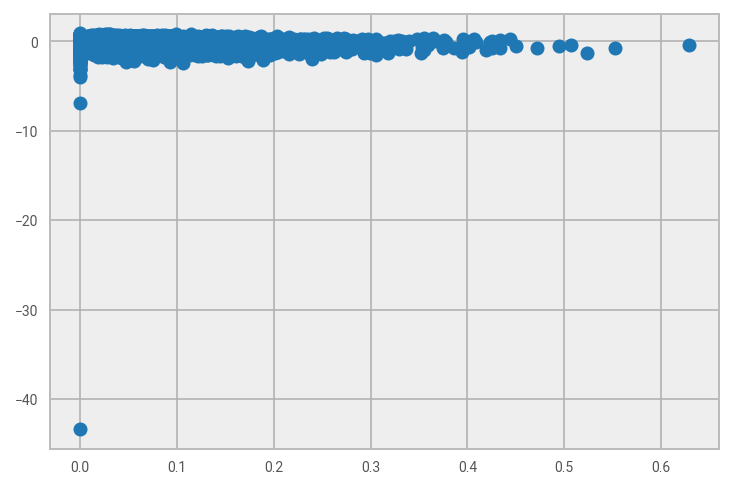

In [91]:
plt.plot(df_sale_ST['sentiment_neg'],df_sale_ST['avmerror'] ,'o')

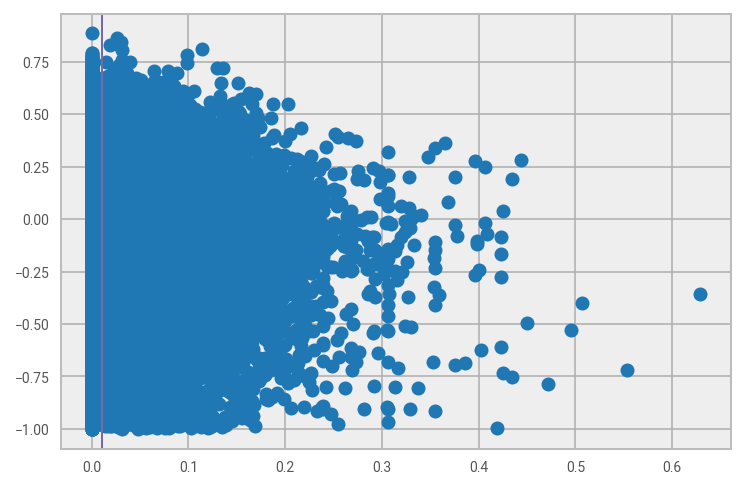

In [252]:
plt.plot(df_sale_ST_filtered['sentiment_neg'],df_sale_ST_filtered['avmerror'] ,'o')
plt.axvline(df_sale_ST_filtered['sentiment_neg'].mean())

In [293]:
print(df_sale_ST_filtered['sentiment_pos'].quantile(0.80))

0.253


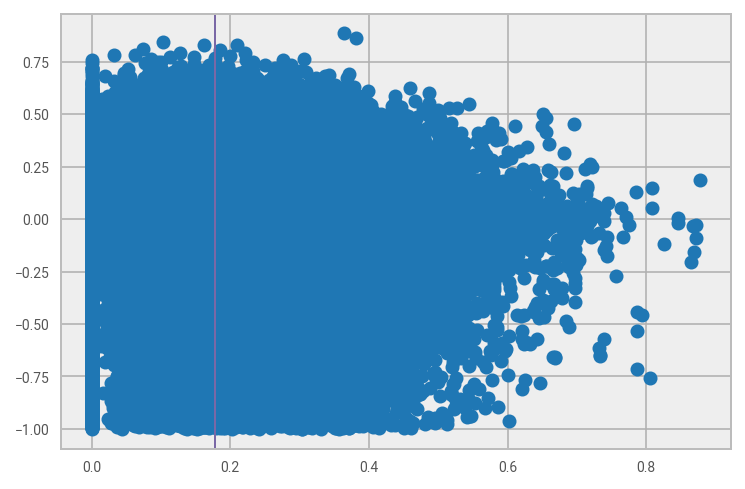

In [253]:
plt.plot(df_sale_ST_filtered['sentiment_pos'],df_sale_ST_filtered['avmerror'] ,'o')
plt.axvline(df_sale_ST_filtered['sentiment_pos'].mean())



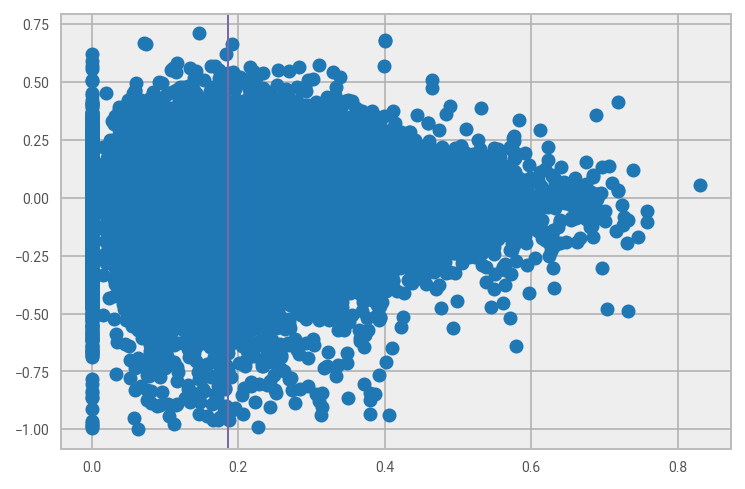

In [254]:
plt.plot(df_rent_ST_filtered['sentiment_pos'],df_rent_ST_filtered['avmerror'] ,'o')
plt.axvline(df_rent_ST_filtered['sentiment_pos'].mean())

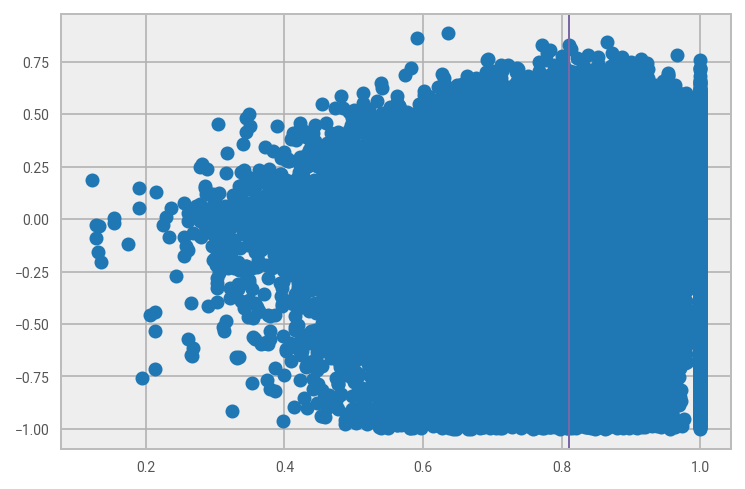

In [255]:
plt.plot(df_sale_ST_filtered['sentiment_neu'],df_sale_ST_filtered['avmerror'] ,'o')
plt.axvline(df_sale_ST_filtered['sentiment_neu'].mean())


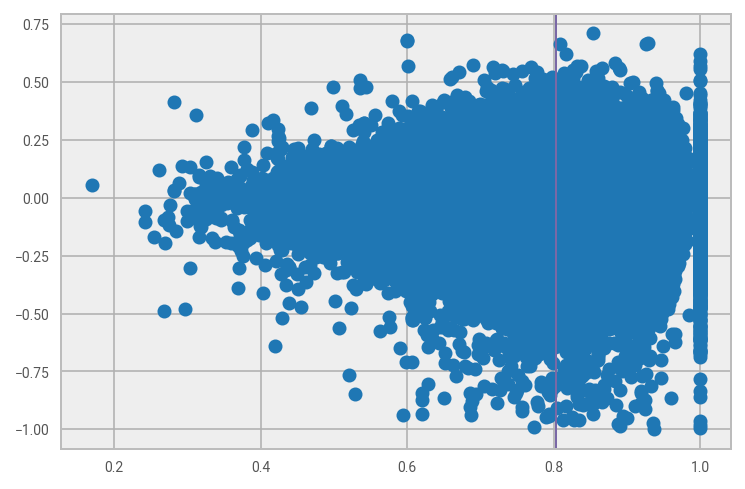

In [256]:
plt.plot(df_rent_ST_filtered['sentiment_neu'],df_rent_ST_filtered['avmerror'] ,'o')
plt.axvline(df_rent_ST_filtered['sentiment_neu'].mean())

In [257]:
df_sale_ST[(df_sale_ST['sentiment_neu'] == df_sale_ST['sentiment_neu'].min())]['publicremarks'].values[0]

'A great investment opportunity!'

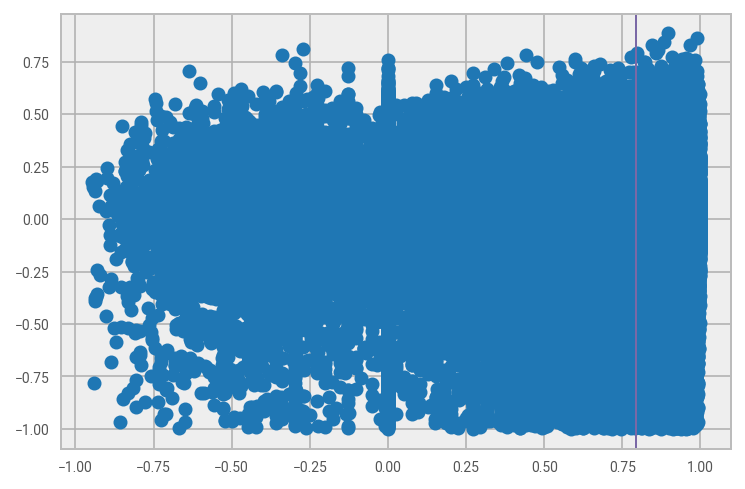

In [258]:
plt.plot(df_sale_ST_filtered['sentiment_cmp'],df_sale_ST_filtered['avmerror'] ,'o')
plt.axvline(df_sale_ST_filtered['sentiment_cmp'].mean())

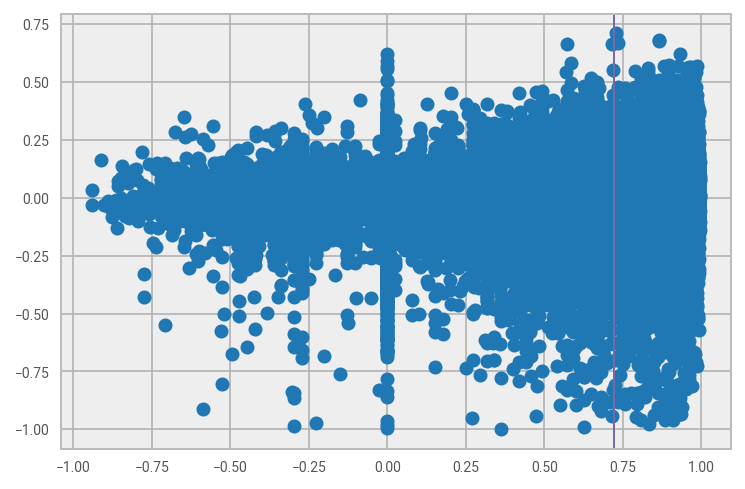

In [259]:
plt.plot(df_rent_ST_filtered['sentiment_cmp'],df_rent_ST_filtered['avmerror'] ,'o')
plt.axvline(df_rent_ST_filtered['sentiment_cmp'].mean())

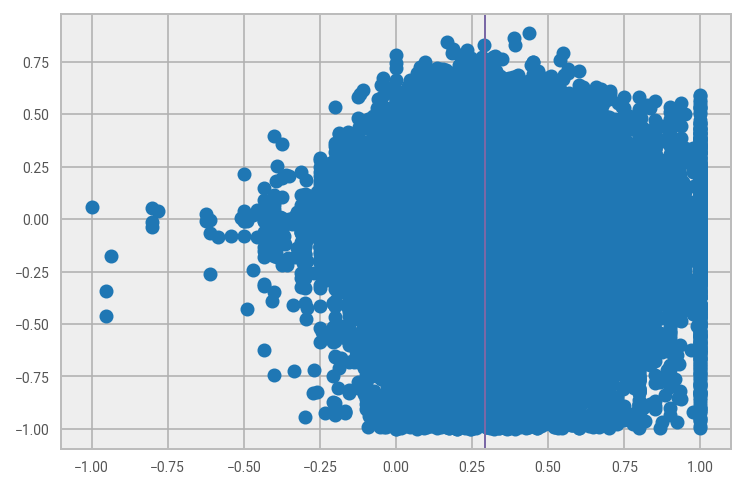

In [260]:
plt.plot(df_sale_ST_filtered['sentiment_polarity'],df_sale_ST_filtered['avmerror'] ,'o')
plt.axvline(df_sale_ST_filtered['sentiment_polarity'].mean())

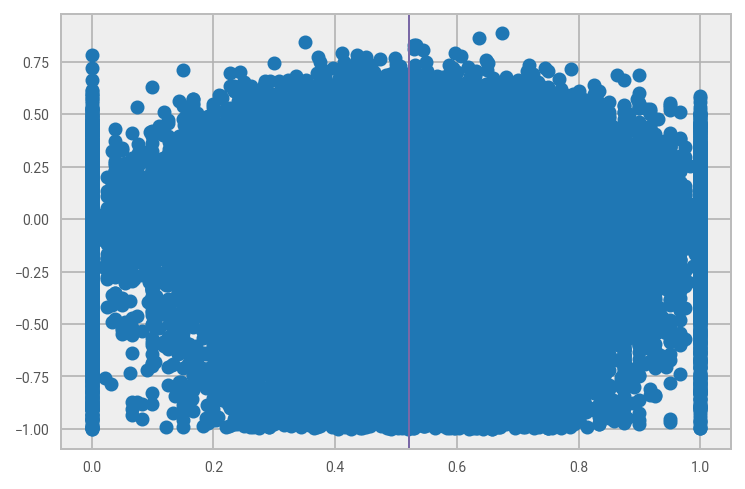

In [261]:
plt.plot(df_sale_ST_filtered['sentiment_subjectivity'],df_sale_ST_filtered['avmerror'] ,'o')
plt.axvline(df_sale_ST_filtered['sentiment_subjectivity'].mean())

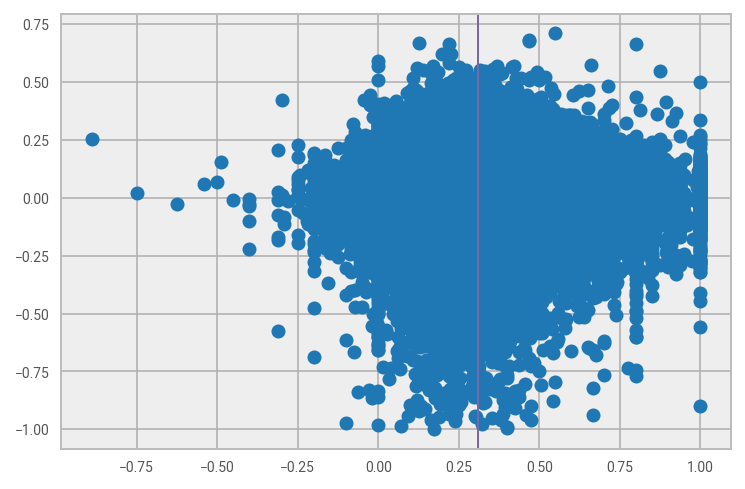

In [262]:
plt.plot(df_rent_ST_filtered['sentiment_polarity'],df_rent_ST_filtered['avmerror'] ,'o')
plt.axvline(df_rent_ST_filtered['sentiment_polarity'].mean())

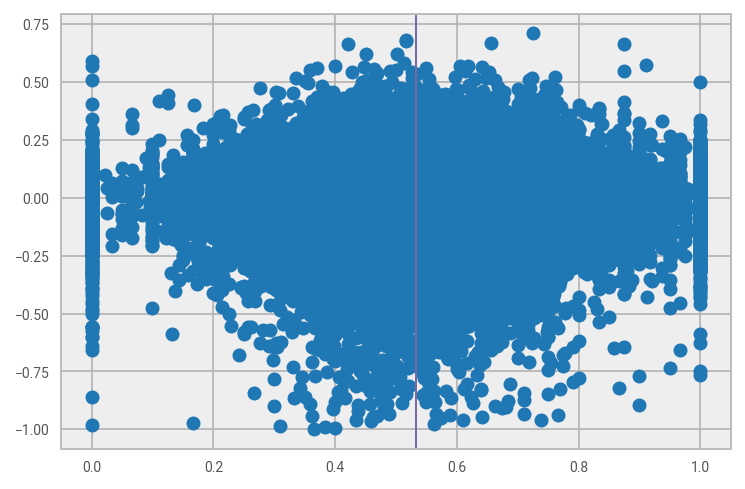

In [263]:
plt.plot(df_rent_ST_filtered['sentiment_subjectivity'],df_rent_ST_filtered['avmerror'] ,'o')
plt.axvline(df_rent_ST_filtered['sentiment_subjectivity'].mean())

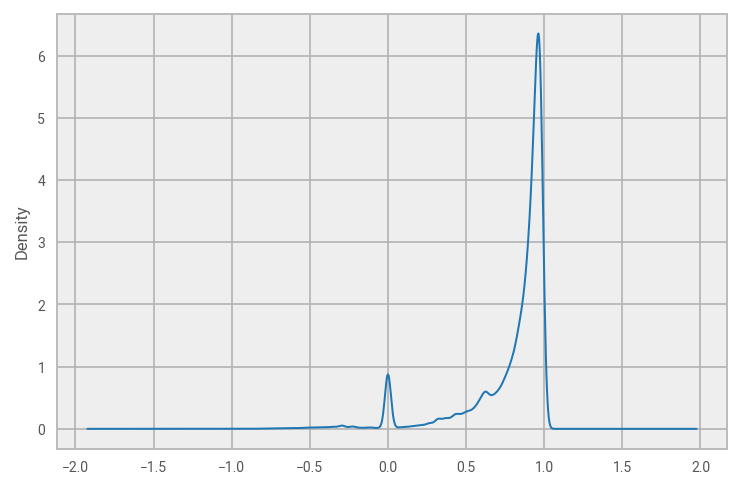

In [264]:
df_sale_ST_filtered.sentiment_cmp.plot.kde()

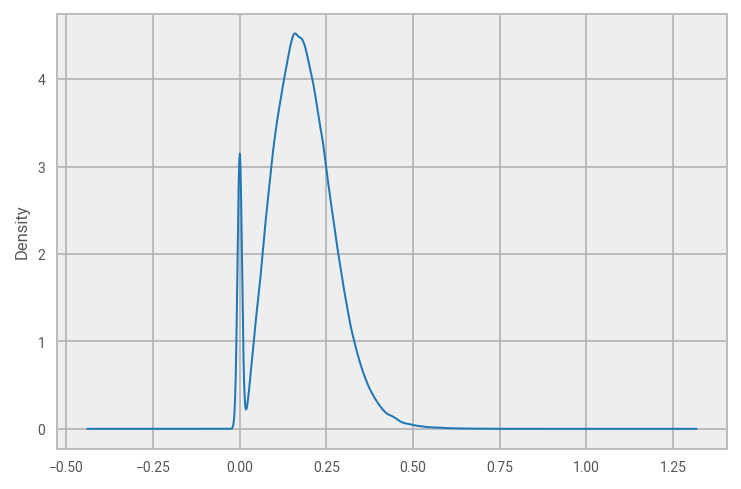

In [265]:
df_sale_ST_filtered.sentiment_pos.plot.kde()

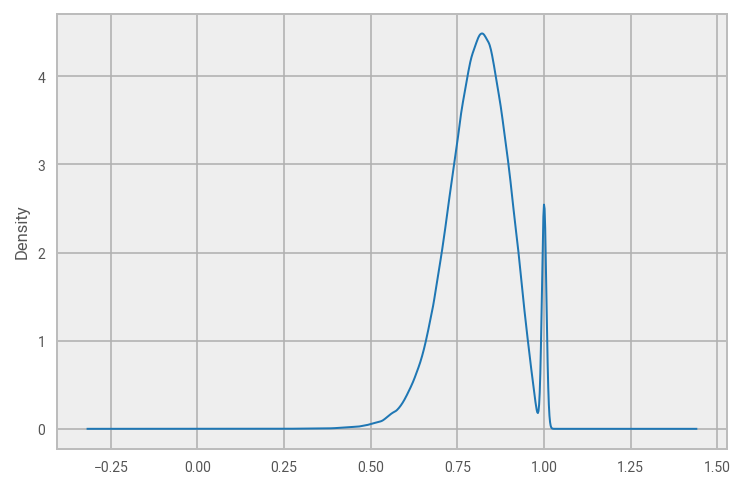

In [266]:
df_sale_ST_filtered.sentiment_neu.plot.kde()

[0.         0.05853333 0.11706667 0.1756     0.23413333 0.29266667
 0.3512     0.40973333 0.46826667 0.5268     0.58533333 0.64386667
 0.7024     0.76093333 0.81946667 0.878     ]
[0.1317166  0.1229635  0.12100501 0.12068235 0.12095959 0.12615589
 0.1308492  0.14504973 0.15454008 0.17135439 0.17071993 0.19461317
 0.15265958 0.28435898 0.08207263]
[0.08613327 0.08368555 0.08233386 0.08218916 0.08178175 0.08441826
 0.0874853  0.0900202  0.09998847 0.10582058 0.10358775 0.14136241
 0.08053623 0.13862072 0.06250278]
[0.17252722 0.16230084 0.16027253 0.15937518 0.15877116 0.16473567
 0.16856069 0.1888395  0.19905823 0.23941238 0.20496101 0.30318132
 0.17759408 0.47591134 0.12797721]
[5.55080e+04 1.06023e+05 1.57898e+05 1.51177e+05 9.52410e+04 4.37950e+04
 1.58060e+04 5.39000e+03 1.72000e+03 6.31000e+02 2.20000e+02 1.09000e+02
 3.70000e+01 1.20000e+01 8.00000e+00]
633575.0


Text(0, 0.5, 'Median AVMError.ABS')

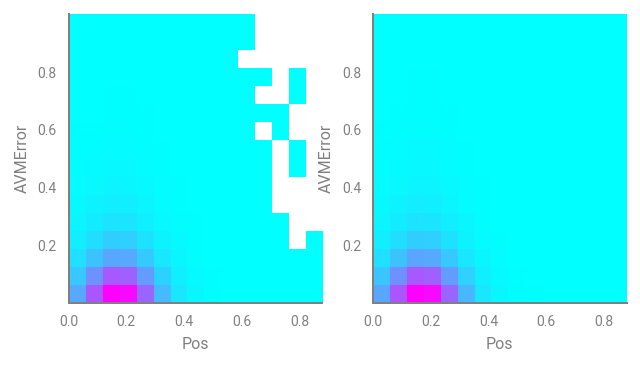

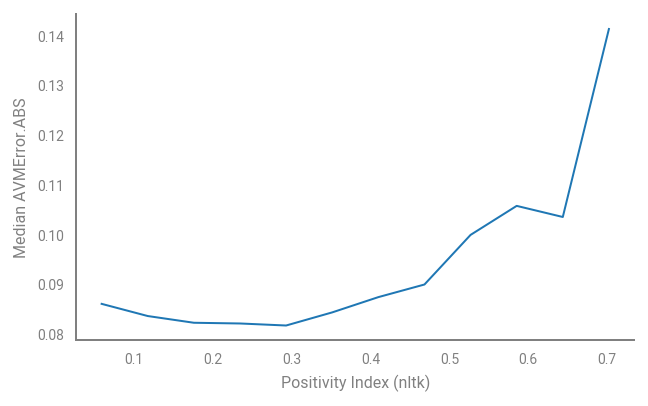

In [281]:


hist, xbins, ybins = np.histogram2d(df_sale_ST_filtered['sentiment_pos'],df_sale_ST_filtered['avmerror'].abs(), bins=(15, 16),normed=False)
hist =  hist/hist.sum()
extent = [xbins.min(),xbins.max(),ybins.min(),ybins.max()]


xhist, xbins =np.histogram(df_sale_ST_filtered['sentiment_pos'], bins=xbins)
yhist, ybins =np.histogram(df_sale_ST_filtered['avmerror'].abs(), bins=ybins)

xhist = xhist/xhist.sum()
yhist = yhist/yhist.sum()


hist_ind = np.zeros([len(xhist),len(yhist)])

for i in range(len(xhist)):
    for j in range(len(yhist)):
        hist_ind[i,j] = xhist[i]*yhist[j]


average_error = np.zeros(len(xhist))
median_error = np.zeros(len(xhist))
p75_error = np.zeros(len(xhist))
count_error = np.zeros(len(xhist))

for i in range(len(xhist)):
    average_error[i] = df_sale_ST_filtered['avmerror'][(df_sale_ST_filtered['sentiment_pos'] >= xbins[i]) &
                                                       (df_sale_ST_filtered['sentiment_pos'] < xbins[i+1])].abs().mean()
    median_error[i] = df_sale_ST_filtered['avmerror'][(df_sale_ST_filtered['sentiment_pos'] >= xbins[i]) &
                                                       (df_sale_ST_filtered['sentiment_pos'] < xbins[i+1])].abs().median()
    p75_error[i] = df_sale_ST_filtered['avmerror'][(df_sale_ST_filtered['sentiment_pos'] >= xbins[i]) &
                                                       (df_sale_ST_filtered['sentiment_pos'] < xbins[i+1])].abs().quantile(0.75)    
    count_error[i] = df_sale_ST_filtered['avmerror'][(df_sale_ST_filtered['sentiment_pos'] >= xbins[i]) &
                                                       (df_sale_ST_filtered['sentiment_pos'] < xbins[i+1])].abs().count()
    
print(xbins)
print(average_error)
print(median_error)
print(p75_error)
print(count_error)

print(count_error.sum())        
        
fig = plt.figure(figsize=(5,3))
ax  = fig.add_subplot(121)
ax.set_facecolor('white')
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color('grey')
ax.spines["left"].set_color('grey')
plt.xticks(color='grey')
plt.yticks(color='grey')


plt.imshow(np.ma.masked_where(hist == 0, hist).T, interpolation='none', origin='lower',
           extent=extent, cmap=plt.cm.cool)
plt.xlabel('Pos', color='grey', fontsize=8)
plt.ylabel('AVMError', color='grey', fontsize=8)


ax  = fig.add_subplot(122)
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color('grey')
ax.spines["left"].set_color('grey')
plt.xticks(color='grey')
plt.yticks(color='grey')

plt.imshow(np.ma.masked_where(hist_ind == 0, hist_ind).T, interpolation='none', origin='lower', extent=extent, cmap=plt.cm.cool)
plt.xlabel('Pos', color='grey', fontsize=8)
plt.ylabel('AVMError', color='grey', fontsize=8)

fig = plt.figure(figsize=(5,3))
ax  = fig.add_subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color('grey')
ax.spines["left"].set_color('grey')
ax.set_facecolor('white')
ax.grid(False)
plt.xticks(color='grey')
plt.yticks(color='grey')

#plt.plot(xbins[1:][0:12],average_error[0:12])
plt.plot(xbins[1:][0:12],median_error[0:12])
#plt.plot(xbins[1:][0:12],p75_error[0:12])
plt.xlabel('Positivity Index (nltk)', color='grey', fontsize=8)
plt.ylabel('Median AVMError.ABS', color='grey', fontsize=8)


In [297]:
len(df_sale_ST_filtered[(df_sale_ST_filtered['avmerror'].abs() > 0.3)])/len(df_sale_ST_filtered)

0.08826407565943155

633576

[0.         0.05853333 0.11706667 0.1756     0.23413333 0.29266667
 0.3512     0.40973333 0.46826667 0.5268     0.58533333 0.64386667
 0.7024     0.76093333 0.81946667 0.878     ]
[-0.01238277  0.00272038  0.00297059  0.00059743 -0.00524453 -0.01482146
 -0.02643024 -0.04495    -0.06522264 -0.07807932 -0.07113223 -0.09124853
 -0.05580627 -0.21900239 -0.08056347]
[-0.00376359  0.00386015  0.00392204  0.00206316 -0.00123675 -0.00584444
 -0.01301909 -0.01977324 -0.03539685 -0.04084734 -0.02961517 -0.06910578
  0.0052663  -0.05745404 -0.06250278]
[ 0.08218495  0.09066335  0.08936364  0.08691091  0.08226024  0.07901664
  0.07356067  0.06585457  0.05311086  0.04833703  0.07536683  0.04527971
  0.0660589   0.05152271 -0.02557283]
[5.55080e+04 1.06023e+05 1.57898e+05 1.51177e+05 9.52410e+04 4.37950e+04
 1.58060e+04 5.39000e+03 1.72000e+03 6.31000e+02 2.20000e+02 1.09000e+02
 3.70000e+01 1.20000e+01 8.00000e+00]
633575.0


Text(0, 0.5, 'Median AVMError')

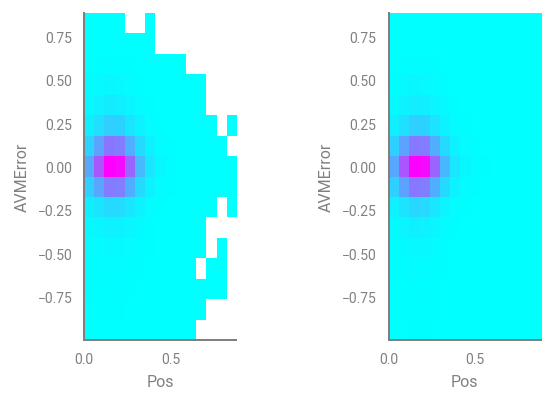

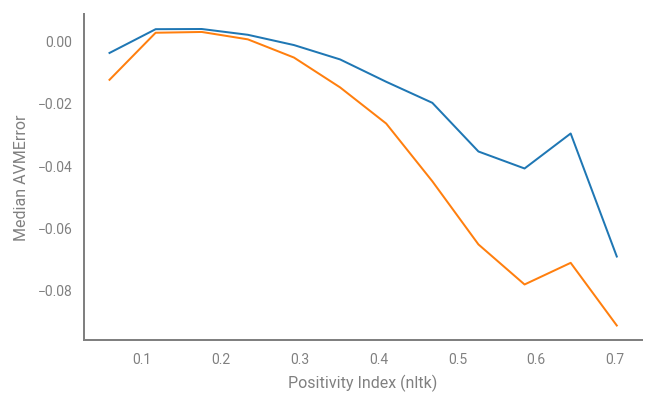

In [288]:


hist, xbins, ybins = np.histogram2d(df_sale_ST_filtered['sentiment_pos'],df_sale_ST_filtered['avmerror'], bins=(15, 16),normed=False)
hist =  hist/hist.sum()
extent = [xbins.min(),xbins.max(),ybins.min(),ybins.max()]


xhist, xbins =np.histogram(df_sale_ST_filtered['sentiment_pos'], bins=xbins)
yhist, ybins =np.histogram(df_sale_ST_filtered['avmerror'], bins=ybins)

xhist = xhist/xhist.sum()
yhist = yhist/yhist.sum()


hist_ind = np.zeros([len(xhist),len(yhist)])

for i in range(len(xhist)):
    for j in range(len(yhist)):
        hist_ind[i,j] = xhist[i]*yhist[j]


average_error = np.zeros(len(xhist))
median_error = np.zeros(len(xhist))
p75_error = np.zeros(len(xhist))
count_error = np.zeros(len(xhist))

for i in range(len(xhist)):
    average_error[i] = df_sale_ST_filtered['avmerror'][(df_sale_ST_filtered['sentiment_pos'] >= xbins[i]) &
                                                       (df_sale_ST_filtered['sentiment_pos'] < xbins[i+1])].mean()
    median_error[i] = df_sale_ST_filtered['avmerror'][(df_sale_ST_filtered['sentiment_pos'] >= xbins[i]) &
                                                       (df_sale_ST_filtered['sentiment_pos'] < xbins[i+1])].median()
    p75_error[i] = df_sale_ST_filtered['avmerror'][(df_sale_ST_filtered['sentiment_pos'] >= xbins[i]) &
                                                       (df_sale_ST_filtered['sentiment_pos'] < xbins[i+1])].quantile(0.75)    
    count_error[i] = df_sale_ST_filtered['avmerror'][(df_sale_ST_filtered['sentiment_pos'] >= xbins[i]) &
                                                       (df_sale_ST_filtered['sentiment_pos'] < xbins[i+1])].count()
    
print(xbins)
print(average_error)
print(median_error)
print(p75_error)
print(count_error)

print(count_error.sum())        
        
fig = plt.figure(figsize=(5,3))
ax  = fig.add_subplot(121)
ax.set_facecolor('white')
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color('grey')
ax.spines["left"].set_color('grey')
plt.xticks(color='grey')
plt.yticks(color='grey')


plt.imshow(np.ma.masked_where(hist == 0, hist).T, interpolation='none', origin='lower',
           extent=extent, cmap=plt.cm.cool)
plt.xlabel('Pos', color='grey', fontsize=8)
plt.ylabel('AVMError', color='grey', fontsize=8)


ax  = fig.add_subplot(122)
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color('grey')
ax.spines["left"].set_color('grey')
plt.xticks(color='grey')
plt.yticks(color='grey')

plt.imshow(np.ma.masked_where(hist_ind == 0, hist_ind).T, interpolation='none', origin='lower', extent=extent, cmap=plt.cm.cool)
plt.xlabel('Pos', color='grey', fontsize=8)
plt.ylabel('AVMError', color='grey', fontsize=8)

fig = plt.figure(figsize=(5,3))
ax  = fig.add_subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color('grey')
ax.spines["left"].set_color('grey')
ax.set_facecolor('white')
ax.grid(False)
plt.xticks(color='grey')
plt.yticks(color='grey')

#
plt.plot(xbins[1:][0:12],median_error[0:12])
plt.plot(xbins[1:][0:12],average_error[0:12])
#plt.plot(xbins[1:][0:12],p75_error[0:12])
plt.xlabel('Positivity Index (nltk)', color='grey', fontsize=8)
plt.ylabel('Median AVMError', color='grey', fontsize=8)

[0.     0.0554 0.1108 0.1662 0.2216 0.277  0.3324 0.3878 0.4432 0.4986
 0.554  0.6094 0.6648 0.7202 0.7756 0.831 ]
[0.08952354 0.08786583 0.08686106 0.08573653 0.08564276 0.08406417
 0.08284682 0.08324416 0.08625624 0.06804363 0.09434857 0.09118064
 0.09510399 0.14631038        nan]
[0.06388069 0.06289183 0.06259749 0.06182863 0.06232643 0.06152555
 0.05985194 0.06116654 0.06191795 0.05323749 0.06296735 0.0629979
 0.06212954 0.1112238         nan]
[0.12034509 0.1172745  0.11686858 0.1153106  0.11596351 0.11610688
 0.11011217 0.11374169 0.11164879 0.0927415  0.11876516 0.13033137
 0.12193936 0.15725925        nan]
[1.0243e+04 1.5324e+04 2.1561e+04 2.1333e+04 1.5605e+04 9.9300e+03
 5.1740e+03 2.2210e+03 8.0600e+02 7.7600e+02 1.9300e+02 7.7000e+01
 4.4000e+01 1.0000e+01 0.0000e+00]
103297.0


Text(0, 0.5, 'Median AVMError.ABS')

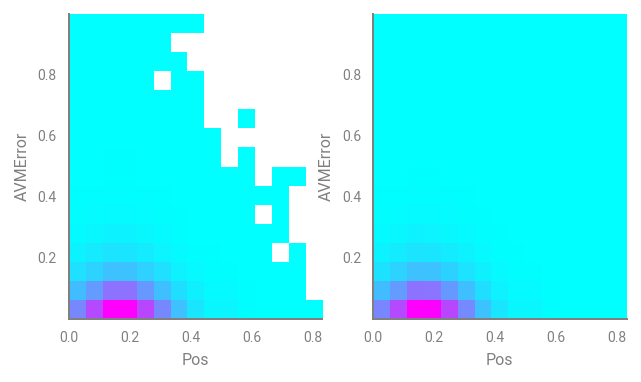

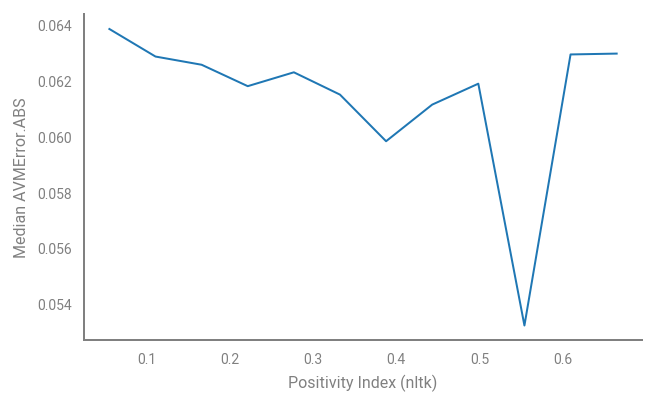

In [285]:

hist, xbins, ybins = np.histogram2d(df_rent_ST_filtered['sentiment_pos'],df_rent_ST_filtered['avmerror'].abs(), bins=(15, 16),normed=False)
hist =  hist/hist.sum()
extent = [xbins.min(),xbins.max(),ybins.min(),ybins.max()]


xhist, xbins =np.histogram(df_rent_ST_filtered['sentiment_pos'], bins=xbins)
yhist, ybins =np.histogram(df_rent_ST_filtered['avmerror'].abs(), bins=ybins)

xhist = xhist/xhist.sum()
yhist = yhist/yhist.sum()


hist_ind = np.zeros([len(xhist),len(yhist)])

for i in range(len(xhist)):
    for j in range(len(yhist)):
        hist_ind[i,j] = xhist[i]*yhist[j]


average_error = np.zeros(len(xhist))
median_error = np.zeros(len(xhist))
p75_error = np.zeros(len(xhist))
count_error = np.zeros(len(xhist))

for i in range(len(xhist)):
    average_error[i] = df_rent_ST_filtered['avmerror'][(df_rent_ST_filtered['sentiment_pos'] >= xbins[i]) &
                                                       (df_rent_ST_filtered['sentiment_pos'] < xbins[i+1])].abs().mean()
    median_error[i] = df_rent_ST_filtered['avmerror'][(df_rent_ST_filtered['sentiment_pos'] >= xbins[i]) &
                                                       (df_rent_ST_filtered['sentiment_pos'] < xbins[i+1])].abs().median()
    p75_error[i] = df_rent_ST_filtered['avmerror'][(df_rent_ST_filtered['sentiment_pos'] >= xbins[i]) &
                                                       (df_rent_ST_filtered['sentiment_pos'] < xbins[i+1])].abs().quantile(0.75)    
    count_error[i] = df_rent_ST_filtered['avmerror'][(df_rent_ST_filtered['sentiment_pos'] >= xbins[i]) &
                                                       (df_rent_ST_filtered['sentiment_pos'] < xbins[i+1])].abs().count()
    
print(xbins)
print(average_error)
print(median_error)
print(p75_error)
print(count_error)

print(count_error.sum())        
        
fig = plt.figure(figsize=(5,3))
ax  = fig.add_subplot(121)
ax.set_facecolor('white')
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color('grey')
ax.spines["left"].set_color('grey')
plt.xticks(color='grey')
plt.yticks(color='grey')


plt.imshow(np.ma.masked_where(hist == 0, hist).T, interpolation='none', origin='lower',
           extent=extent, cmap=plt.cm.cool)
plt.xlabel('Pos', color='grey', fontsize=8)
plt.ylabel('AVMError', color='grey', fontsize=8)


ax  = fig.add_subplot(122)
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color('grey')
ax.spines["left"].set_color('grey')
plt.xticks(color='grey')
plt.yticks(color='grey')

plt.imshow(np.ma.masked_where(hist_ind == 0, hist_ind).T, interpolation='none', origin='lower', extent=extent, cmap=plt.cm.cool)
plt.xlabel('Pos', color='grey', fontsize=8)
plt.ylabel('AVMError', color='grey', fontsize=8)

fig = plt.figure(figsize=(5,3))
ax  = fig.add_subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color('grey')
ax.spines["left"].set_color('grey')
ax.set_facecolor('white')
ax.grid(False)
plt.xticks(color='grey')
plt.yticks(color='grey')

#plt.plot(xbins[1:][0:12],average_error[0:12])
plt.plot(xbins[1:][0:12],median_error[0:12])
#plt.plot(xbins[1:][0:12],p75_error[0:12])
plt.xlabel('Positivity Index (nltk)', color='grey', fontsize=8)
plt.ylabel('Median AVMError.ABS', color='grey', fontsize=8)

In [282]:
df_sale_ST_filtered.columns

Index(['listingid', 'asgpropid', 'qtr', 'tax_year', 'cbsa_div', 'cbsa',
       'state', 'Transdate', 'Transprice', 'bedrooms', 'total_value',
       'cj_living_area', 'basement', 'has_pool', 'parking', 'is_poor',
       'is_good', 'HAS_VIEW', 'has_golf', 'has_water', 'has_woods', 'has_hill',
       'fips_code', 'census_tract', 'zip', 'effective_year_built', 'story',
       'ListingPrice', 'publicremarks', 'avmValue', 'avmerror', 'rentsale',
       'sentiment_cmp', 'sentiment_neg', 'sentiment_pos', 'sentiment_neu',
       'sentiment_polarity', 'sentiment_subjectivity'],
      dtype='object')

[0.122      0.18053333 0.23906667 0.2976     0.35613333 0.41466667
 0.4732     0.53173333 0.59026667 0.6488     0.70733333 0.76586667
 0.8244     0.88293333 0.94146667 1.        ]
[0.09352884 0.28435898 0.15494767 0.20149256 0.17246126 0.17334717
 0.15971885 0.14795466 0.13453727 0.12667792 0.12228938 0.12076551
 0.12092252 0.12198036 0.12142095]
[0.0908308  0.13862072 0.08053623 0.14398222 0.10348393 0.10799731
 0.1016773  0.092199   0.08904401 0.08473259 0.08258015 0.08214089
 0.0824779  0.08310086 0.08237874]
[0.20355928 0.75921093 0.65364215 0.91264692 0.96416285 0.94216945
 0.97810768 0.99657745 0.99921256 0.99921782 0.9992616  0.99912019
 0.99897045 0.99572452 0.99935746]
[9.00000e+00 1.20000e+01 4.30000e+01 1.23000e+02 2.46000e+02 7.48000e+02
 2.11600e+03 6.54300e+03 1.93360e+04 5.20270e+04 1.06526e+05 1.57961e+05
 1.50733e+05 9.24720e+04 1.85890e+04]
607484.0


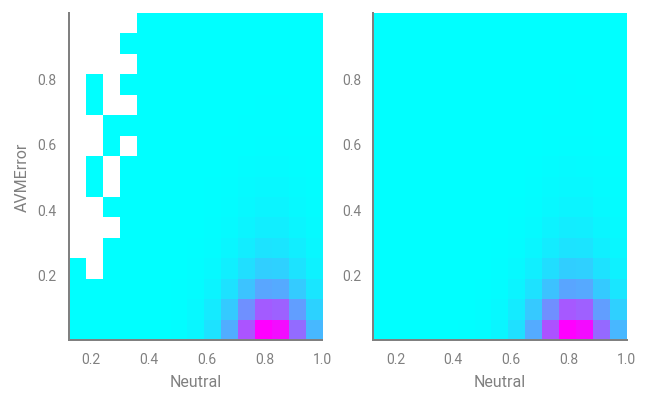

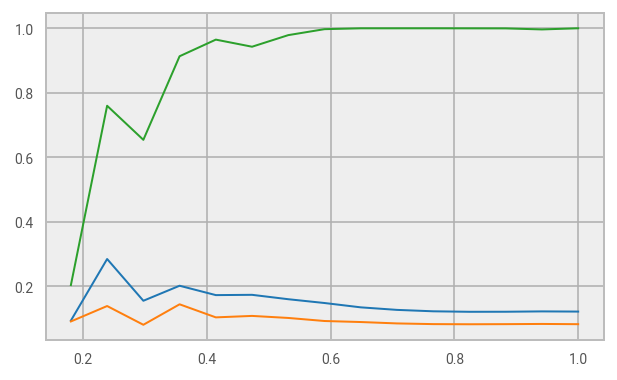

In [268]:


hist, xbins, ybins = np.histogram2d(df_sale_ST_filtered['sentiment_neu'],df_sale_ST_filtered['avmerror'].abs(), bins=(15, 16),normed=False)
hist =  hist/hist.sum()
extent = [xbins.min(),xbins.max(),ybins.min(),ybins.max()]


xhist, xbins =np.histogram(df_sale_ST_filtered['sentiment_neu'], bins=xbins)
yhist, ybins =np.histogram(df_sale_ST_filtered['avmerror'].abs(), bins=ybins)

xhist = xhist/xhist.sum()
yhist = yhist/yhist.sum()


hist_ind = np.zeros([len(xhist),len(yhist)])

for i in range(len(xhist)):
    for j in range(len(yhist)):
        hist_ind[i,j] = xhist[i]*yhist[j]


average_error = np.zeros(len(xhist))
median_error = np.zeros(len(xhist))
p75_error = np.zeros(len(xhist))
count_error = np.zeros(len(xhist))

for i in range(len(xhist)):
    average_error[i] = df_sale_ST_filtered['avmerror'][(df_sale_ST_filtered['sentiment_neu'] >= xbins[i]) &
                                                       (df_sale_ST_filtered['sentiment_neu'] < xbins[i+1])].abs().mean()
    median_error[i] = df_sale_ST_filtered['avmerror'][(df_sale_ST_filtered['sentiment_neu'] >= xbins[i]) &
                                                       (df_sale_ST_filtered['sentiment_neu'] < xbins[i+1])].abs().median()
    p75_error[i] = df_sale_ST_filtered['avmerror'][(df_sale_ST_filtered['sentiment_neu'] >= xbins[i]) &
                                                       (df_sale_ST_filtered['sentiment_neu'] < xbins[i+1])].abs().quantile(0.999999)    
    count_error[i] = df_sale_ST_filtered['avmerror'][(df_sale_ST_filtered['sentiment_neu'] >= xbins[i]) &
                                                       (df_sale_ST_filtered['sentiment_neu'] < xbins[i+1])].abs().count()
    
print(xbins)
print(average_error)
print(median_error)
print(p75_error)
print(count_error)

print(count_error.sum())        
        
fig = plt.figure(figsize=(5,3))
ax  = fig.add_subplot(121)
ax.set_facecolor('white')
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color('grey')
ax.spines["left"].set_color('grey')
plt.xticks(color='grey')
plt.yticks(color='grey')


plt.imshow(np.ma.masked_where(hist == 0, hist).T, interpolation='none', origin='lower',
           extent=extent, cmap=plt.cm.cool, aspect='auto')
plt.xlabel('Neutral', color='grey', fontsize=8)
plt.ylabel('AVMError', color='grey', fontsize=8)


ax  = fig.add_subplot(122)
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color('grey')
ax.spines["left"].set_color('grey')
plt.xticks(color='grey')
plt.yticks(color='grey')

plt.imshow(np.ma.masked_where(hist_ind == 0, hist_ind).T, interpolation='none', origin='lower', 
           extent=extent, cmap=plt.cm.cool, aspect='auto')
plt.xlabel('Neutral', color='grey', fontsize=8)
plt.ylabel('', color='grey', fontsize=8)

fig = plt.figure(figsize=(5,3))
plt.plot(xbins[1:],average_error)
plt.plot(xbins[1:],median_error)
plt.plot(xbins[1:],p75_error)

In [269]:
plot()

NameError: name 'plot' is not defined

In [ ]:


hist, xbins, ybins = np.histogram2d(df_rent_ST_filtered['sentiment_polarity'],df_rent_ST_filtered['avmerror'].abs(), bins=(15, 16),normed=False)
hist =  hist/hist.sum()
extent = [xbins.min(),xbins.max(),ybins.min(),ybins.max()]


xhist, xbins =np.histogram(df_rent_ST_filtered['sentiment_polarity'], bins=xbins)
yhist, ybins =np.histogram(df_rent_ST_filtered['avmerror'].abs(), bins=ybins)

xhist = xhist/xhist.sum()
yhist = yhist/yhist.sum()


hist_ind = np.zeros([len(xhist),len(yhist)])

for i in range(len(xhist)):
    for j in range(len(yhist)):
        hist_ind[i,j] = xhist[i]*yhist[j]


        
        
fig = plt.figure(figsize=(5,3))
ax  = fig.add_subplot(121)
ax.set_facecolor('white')
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color('grey')
ax.spines["left"].set_color('grey')
plt.xticks(color='grey')
plt.yticks(color='grey')


plt.imshow(np.ma.masked_where(hist == 0, hist).T, interpolation='none', origin='lower',
           extent=extent, cmap=plt.cm.cool)
plt.xlabel('Polarity', color='grey', fontsize=8)
plt.ylabel('AVMError', color='grey', fontsize=8)


ax  = fig.add_subplot(122)
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color('grey')
ax.spines["left"].set_color('grey')
plt.xticks(color='grey')
plt.yticks(color='grey')

plt.imshow(np.ma.masked_where(hist_ind == 0, hist_ind).T, interpolation='none', origin='lower', extent=extent, cmap=plt.cm.cool)
plt.xlabel('Polarity', color='grey', fontsize=8)
plt.ylabel('AVMError', color='grey', fontsize=8)

In [ ]:


hist, xbins, ybins = np.histogram2d(df_rent_ST_filtered['sentiment_neu'],df_rent_ST_filtered['avmerror'].abs(), bins=(15, 16),normed=False)
hist =  hist/hist.sum()
extent = [xbins.min(),xbins.max(),ybins.min(),ybins.max()]


xhist, xbins =np.histogram(df_rent_ST_filtered['sentiment_neu'], bins=xbins)
yhist, ybins =np.histogram(df_rent_ST_filtered['avmerror'].abs(), bins=ybins)

xhist = xhist/xhist.sum()
yhist = yhist/yhist.sum()

print(hist.shape)
print(ybins.shape)

hist_ind = np.zeros([len(xhist),len(yhist)])

average_error = np.zeros(len(xhist))
count_error = np.zeros(len(xhist))

for i in range(len(xhist)):
    average_error[i] = df_rent_ST_filtered['avmerror'][(df_rent_ST_filtered['sentiment_neu'] >= xbins[i]) &
                                                       (df_rent_ST_filtered['sentiment_neu'] < xbins[i+1])].abs().mean()
    count_error[i] = df_rent_ST_filtered['avmerror'][(df_rent_ST_filtered['sentiment_neu'] >= xbins[i]) &
                                                       (df_rent_ST_filtered['sentiment_neu'] < xbins[i+1])].abs().count()
    
print(xbins)
print(average_error)
print(count_error)

print(count_error.sum())

for i in range(len(xhist)):
    for j in range(len(yhist)):
        hist_ind[i,j] = xhist[i]*yhist[j]

fig = plt.figure(figsize=(5,3))
ax  = fig.add_subplot(121)
ax.set_facecolor('white')
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color('grey')
ax.spines["left"].set_color('grey')
plt.xticks(color='grey')
plt.yticks(color='grey')


plt.imshow(np.ma.masked_where(hist == 0, hist).T, interpolation='none', origin='lower',
           extent=extent, cmap=plt.cm.cool)
plt.xlabel('X', color='grey', fontsize=8)
plt.ylabel('Y', color='grey', fontsize=8)


ax  = fig.add_subplot(122)
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color('grey')
ax.spines["left"].set_color('grey')
plt.xticks(color='grey')
plt.yticks(color='grey')

plt.imshow(np.ma.masked_where(hist_ind == 0, hist_ind).T, interpolation='none', origin='lower', extent=extent, cmap=plt.cm.cool)
plt.xlabel('X', color='grey', fontsize=8)
plt.ylabel('Y', color='grey', fontsize=8)